In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
os.listdir("..\\data\\raw")

['articles.csv',
 'customers.csv',
 'hm-recsys-young-female-data.zip',
 'young_female_trans.csv']

In [17]:
trans = pd.read_csv("../data/raw/young_female_trans.csv")
customers = pd.read_csv("../data/raw/customers.csv")
articles = pd.read_csv("../data/raw/articles.csv")

In [18]:
print(f'Number of customers: {customers['customer_id'].nunique()}')
print(f'Number of articles: {articles['article_id'].nunique()}')
print(f'Number of customers making transactions: {trans['customer_id'].nunique()}')
print(f'Number of articles bought: {trans['article_id'].nunique()}')

Number of customers: 1371980
Number of articles: 105542
Number of customers making transactions: 16595
Number of articles bought: 63887


## Customers analysis and preparation

In [19]:
customers["postal_code"].nunique()

352899

<Axes: xlabel='count', ylabel='fashion_news_frequency'>

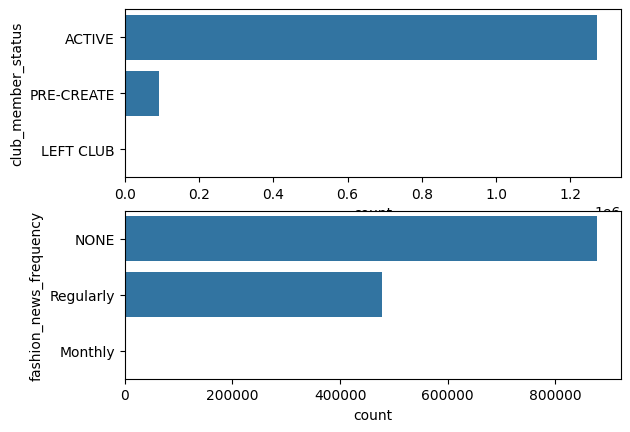

In [20]:
plt.figure()
plt.subplot(2,1,1)
sns.countplot(customers['club_member_status'])
plt.subplot(2,1,2)
sns.countplot(customers['fashion_news_frequency'])

In [22]:
customers['club_member_status'] = customers['club_member_status'].fillna('ACTIVE')
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('NONE')

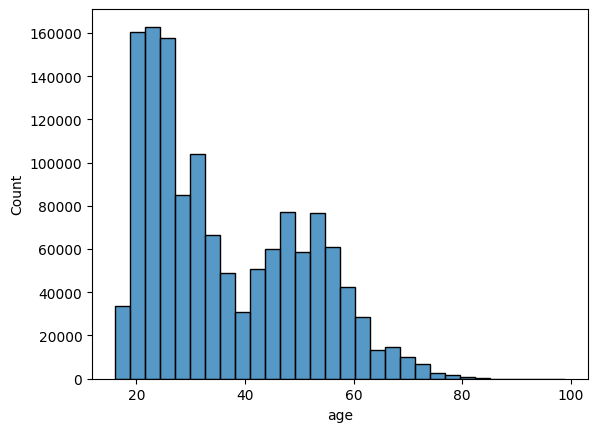

In [23]:
plt.figure()
sns.histplot(customers['age'], bins=30)
plt.show()

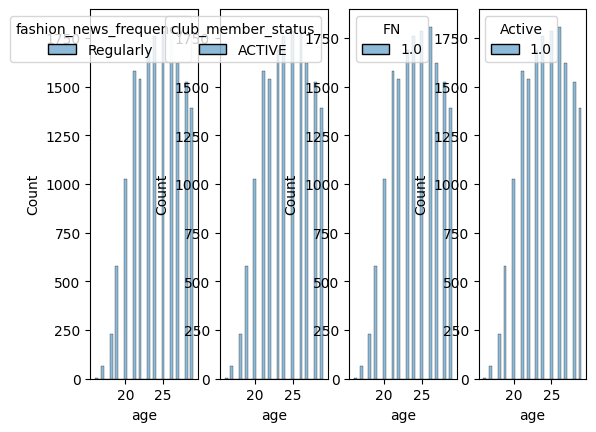

In [24]:
young_customers = customers[customers['customer_id'].isin(trans['customer_id'])]
# young_customers
plt.figure()
plt.subplot(1,4,1)
sns.histplot(young_customers, x='age', hue='fashion_news_frequency')
plt.subplot(1,4,2)
sns.histplot(young_customers, x='age', hue='club_member_status')
plt.subplot(1,4,3)
sns.histplot(young_customers, x='age', hue='FN')
plt.subplot(1,4,4)
sns.histplot(young_customers, x='age', hue='Active')
plt.show()

In [25]:
young_customers_info = young_customers[['customer_id', 'age']]
young_customers_info.head()

,customer_id,age
154,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,28.0
349,0010e8eb18f131e724d6997909af0808adbba057529edb...,25.0
415,0013bde09d10db6b0a6a3b0987ac60b643013dfc6f924b...,27.0
458,00155b2ef48cfb5d2fce4642f670f151efe0747542a5b9...,21.0
576,001a7fb6def4cc4de27cb02f0025ea28c8ee74efdd3c73...,24.0


## Articles analysis and preparation

In [26]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [27]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [28]:
articles.agg('nunique')

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [29]:
articles_text = articles.filter(regex='name$|detail_desc')
articles_code = articles.filter(regex='code$|no$|id$')
articles_code.columns = [s.replace('_no', '_code') for s in list(articles_code.columns)]

In [30]:
articles_code.head()

,article_id,product_code,product_type_code,graphical_appearance_code,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_code,index_code,index_group_code,section_code,garment_group_code
0,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002
1,108775044,108775,253,1010016,10,3,9,1676,A,1,16,1002
2,108775051,108775,253,1010017,11,1,9,1676,A,1,16,1002
3,110065001,110065,306,1010016,9,4,5,1339,B,1,61,1017
4,110065002,110065,306,1010016,10,3,9,1339,B,1,61,1017


In [31]:
articles_text.head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [32]:
articles_text.isna().sum()

prod_name                         0
product_type_name                 0
product_group_name                0
graphical_appearance_name         0
colour_group_name                 0
perceived_colour_value_name       0
perceived_colour_master_name      0
department_name                   0
index_name                        0
index_group_name                  0
section_name                      0
garment_group_name                0
detail_desc                     416
dtype: int64

In [56]:
articles_text = articles_text.fillna('')
descriptions = articles_text.agg(' '.join, axis=1)

descriptions =  pd.concat([articles["article_id"], descriptions], axis=1)
descriptions.columns = ["article_id", "desc"]
descriptions

,article_id,desc
0,108775015,Strap top Vest top Garment Upper body Solid Bl...
1,108775044,Strap top Vest top Garment Upper body Solid Wh...
2,108775051,Strap top (1) Vest top Garment Upper body Stri...
3,110065001,OP T-shirt (Idro) Bra Underwear Solid Black Da...
4,110065002,OP T-shirt (Idro) Bra Underwear Solid White Li...
...,...,...
105537,953450001,5pk regular Placement1 Socks Socks & Tights Pl...
105538,953763001,SPORT Malaga tank Vest top Garment Upper body ...
105539,956217002,Cartwheel dress Dress Garment Full body Solid ...
105540,957375001,CLAIRE HAIR CLAW Hair clip Accessories Solid B...


In [ ]:
descriptions.head()

,article_id,desc
0,108775015,Strap top Vest top Garment Upper body Solid Bl...
1,108775044,Strap top Vest top Garment Upper body Solid Wh...
2,108775051,Strap top (1) Vest top Garment Upper body Stri...
3,110065001,OP T-shirt (Idro) Bra Underwear Solid Black Da...
4,110065002,OP T-shirt (Idro) Bra Underwear Solid White Li...


In [ ]:
articles_code = articles_code.astype('category')
articles_code['article_id'] = articles['article_id']

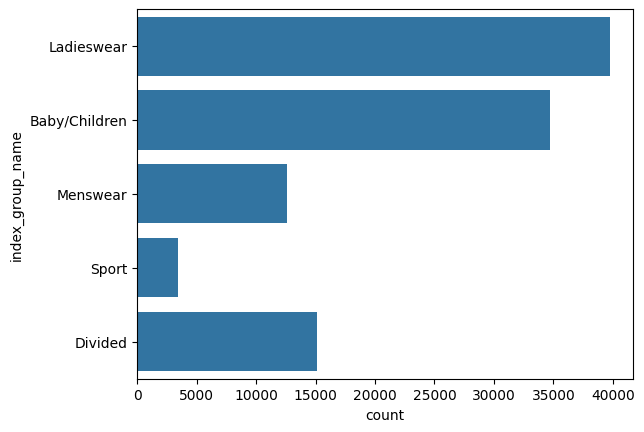

In [ ]:
plt.figure()
sns.countplot(articles_text['index_group_name'])
plt.show()

## Transaction analysis and preparation

In [ ]:
trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,00be0a263381af38132d31225e8fb12fbc527c654b4464...,644522001,0.059305,2
1,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1
2,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1
3,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1
4,2018-09-20,0137b87739a796f65396d8483173f66318039d19a2583f...,577992001,0.011254,2


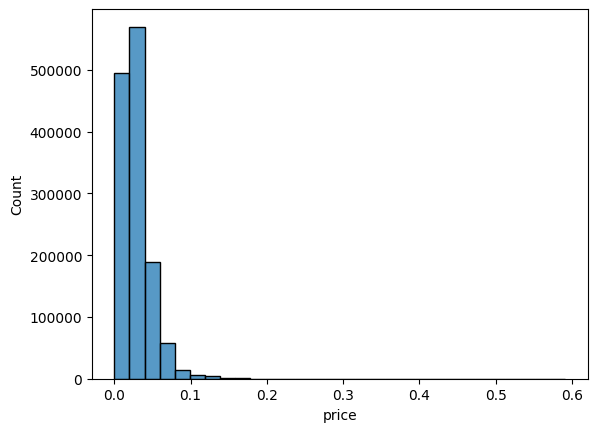

In [ ]:
plt.figure()
sns.histplot(trans['price'], bins=30)
plt.show()

In [ ]:
trans.describe()

,article_id,price,sales_channel_id
count,1.337996e+06,1.337996e+06,1.337996e+06
mean,7.100114e+08,2.821994e-02,1.781094e+00
std,1.288919e+08,1.864222e-02,4.135047e-01
min,1.087750e+08,1.525424e-04,1.000000e+00
25%,6.557840e+08,1.659322e-02,2.000000e+00
50%,7.256630e+08,2.540678e-02,2.000000e+00
75%,7.991900e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [ ]:
num_articles = trans.groupby(['customer_id', 'article_id', 't_dat']).agg('count').reset_index()
num_articles.sort_values(by='price', ascending=False)

,customer_id,article_id,t_dat,price,sales_channel_id
447248,61da44a2758206d5701771f4315637b40c8321b5111916...,507909001,2019-02-23,106,106
447246,61da44a2758206d5701771f4315637b40c8321b5111916...,501616007,2019-02-23,70,70
447249,61da44a2758206d5701771f4315637b40c8321b5111916...,507909001,2019-04-15,67,67
447264,61da44a2758206d5701771f4315637b40c8321b5111916...,850917001,2020-09-13,58,58
447250,61da44a2758206d5701771f4315637b40c8321b5111916...,507910001,2019-05-03,35,35
...,...,...,...,...,...
1185892,fff7f145e356557541af211bb11aa9d78d7edf51bd3c40...,832453005,2020-06-26,1,1
1185891,fff7f145e356557541af211bb11aa9d78d7edf51bd3c40...,832453001,2020-06-30,1,1
1185890,fff7f145e356557541af211bb11aa9d78d7edf51bd3c40...,821398002,2020-07-10,1,1
1185889,fff7f145e356557541af211bb11aa9d78d7edf51bd3c40...,818036002,2020-05-29,1,1


In [ ]:
trans['t_dat'] = pd.to_datetime(trans['t_dat'])
trans['date_diff'] = (pd.to_datetime('today') - trans['t_dat']).dt.days
trans.head() 

,t_dat,customer_id,article_id,price,sales_channel_id,date_diff
0,2018-09-20,00be0a263381af38132d31225e8fb12fbc527c654b4464...,644522001,0.059305,2,2157
1,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1,2157
2,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1,2157
3,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1,2157
4,2018-09-20,0137b87739a796f65396d8483173f66318039d19a2583f...,577992001,0.011254,2,2157


In [ ]:
trans_stats = trans.groupby(['customer_id', 'article_id', 't_dat'])['price'].agg(['count', 'sum']).reset_index()
trans_stats

,customer_id,article_id,t_dat,count,sum
0,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,483064002,2019-09-21,1,0.025407
1,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,525518005,2019-09-21,1,0.042356
2,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,541518004,2019-12-01,1,0.016932
3,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,562245018,2019-12-01,2,0.033864
4,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,562245100,2020-06-28,1,0.016932
...,...,...,...,...,...
1185913,fffcaf3331444dd593ed70591174bef6a8bf319c7948c5...,612481004,2019-07-22,1,0.022017
1185914,fffcaf3331444dd593ed70591174bef6a8bf319c7948c5...,741356002,2020-05-16,1,0.033881
1185915,fffcaf3331444dd593ed70591174bef6a8bf319c7948c5...,763943005,2019-11-29,1,0.009475
1185916,fffcaf3331444dd593ed70591174bef6a8bf319c7948c5...,771981003,2019-11-29,1,0.013542


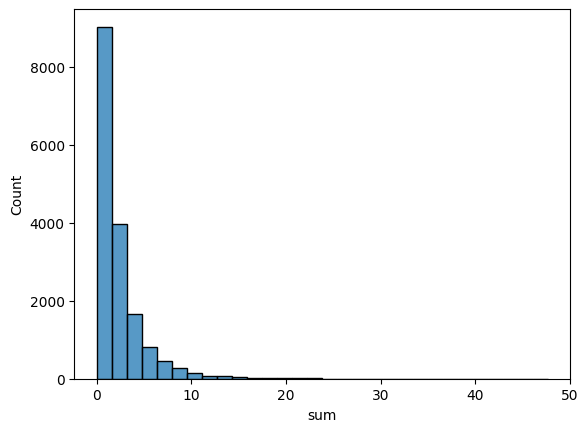

In [ ]:
plt.figure()
sns.histplot(trans_stats.groupby('customer_id')['sum'].agg('sum'), bins=30)
plt.show()

In [ ]:
interactions = pd.merge(trans_stats, trans, on=['customer_id','article_id','t_dat'])
interactions

,customer_id,article_id,t_dat,count,sum,price,sales_channel_id,date_diff
0,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,483064002,2019-09-21,1,0.025407,0.025407,2,1791
1,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,525518005,2019-09-21,1,0.042356,0.042356,2,1791
2,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,541518004,2019-12-01,1,0.016932,0.016932,2,1720
3,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,562245018,2019-12-01,2,0.033864,0.016932,2,1720
4,00066fdcf5f0da690b898b287d05ce477bd2764ce975d1...,562245018,2019-12-01,2,0.033864,0.016932,2,1720
...,...,...,...,...,...,...,...,...
1337991,fffcaf3331444dd593ed70591174bef6a8bf319c7948c5...,612481004,2019-07-22,1,0.022017,0.022017,2,1852
1337992,fffcaf3331444dd593ed70591174bef6a8bf319c7948c5...,741356002,2020-05-16,1,0.033881,0.033881,2,1553
1337993,fffcaf3331444dd593ed70591174bef6a8bf319c7948c5...,763943005,2019-11-29,1,0.009475,0.009475,2,1722
1337994,fffcaf3331444dd593ed70591174bef6a8bf319c7948c5...,771981003,2019-11-29,1,0.013542,0.013542,2,1722


## Export the data frames

In [ ]:
dirpath = 'Dataset/clean'
young_customers_info.to_csv(f'{dirpath}/young_customers.csv', index=False)
descriptions.to_csv(f'{dirpath}/article_descriptions.csv', index=False)
articles_code.to_csv(f'{dirpath}/article_info.csv', index=False)
interactions.to_csv(f'{dirpath}/transactions.csv', index=False)
